Análisis del Dataset: TITANIC

Equipo: Héctor Olmos, Hoda Norouszi

10 de Julio del 2025

Importación de Bibliotecas y Carga de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Configurar estilo de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar datos
ruta = r"H:\ironhack\Data_Scientist\ironhack_ejercicios\Data_Scientist\Exercises\114_TITANIC\titanic.csv"
titanic = pd.read_csv(ruta)

# Ver estructura inicial
print("Dimensiones del dataset:", titanic.shape)
titanic.head()

Dimensiones del dataset: (937, 9)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked
0,0.0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,Mr. William Henry Allen,male,35.0,0.0,0.0,8.0500,S


Preprocesamiento de Datos

In [3]:
# Limpiar filas vacías adicionales
titanic = titanic.dropna(how='all')

# Convertir 'Age' a float y manejar valores faltantes
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')

# Extraer títulos de los nombres
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_replacements = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 
    'Capt': 'Rare', 'Col': 'Rare', 'Countess': 'Rare',
    'Don': 'Rare', 'Dr': 'Rare', 'Jonkheer': 'Rare',
    'Lady': 'Rare', 'Major': 'Rare', 'Rev': 'Rare', 'Sir': 'Rare'
}
titanic['Title'] = titanic['Title'].replace(title_replacements)

# Crear variable de tamaño familiar
titanic['FamilySize'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard'] + 1
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

# Crear categorías de edad
bins = [0, 10, 18, 30, 50, 100]
labels = ['Niño', 'Adolescente', 'Joven', 'Adulto', 'Mayor']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

# Verificar transformaciones
titanic[['Name', 'Title', 'FamilySize', 'IsAlone', 'AgeGroup']].head()


,Name,Title,FamilySize,IsAlone,AgeGroup
0,Mr. Owen Harris Braund,NaN,2.0,0,Joven
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,NaN,2.0,0,Adulto
2,Miss. Laina Heikkinen,NaN,1.0,1,Joven
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,2.0,0,Adulto
4,Mr. William Henry Allen,NaN,1.0,1,Adulto


Análisis de Datos y Visualizaciones

Edad Promedio por Clase

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\1941299109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Age', data=age_by_class, palette='viridis')


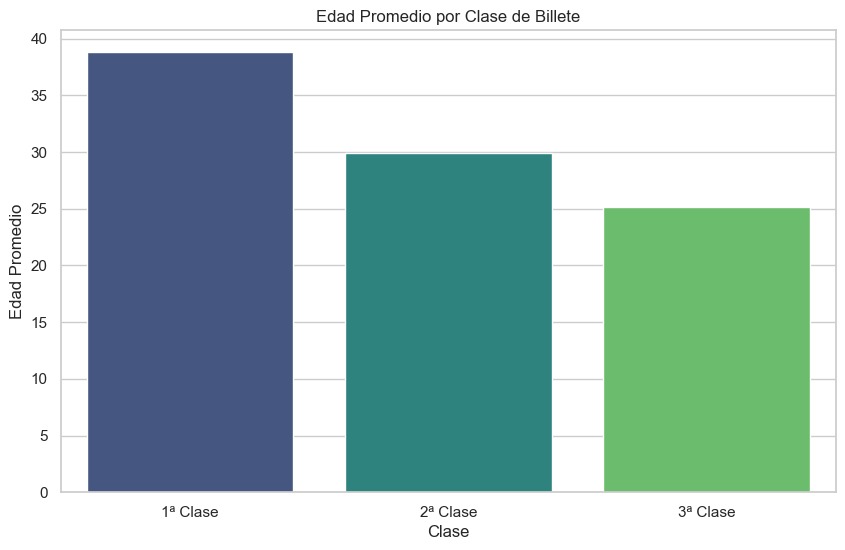

In [35]:
# Calcular y visualizar
age_by_class = titanic.groupby('Pclass')['Age'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Age', data=age_by_class, palette='viridis')
plt.title('Edad Promedio por Clase de Billete')
plt.xlabel('Clase')
plt.ylabel('Edad Promedio')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.show()

3.2. Distribución de Género por Clase

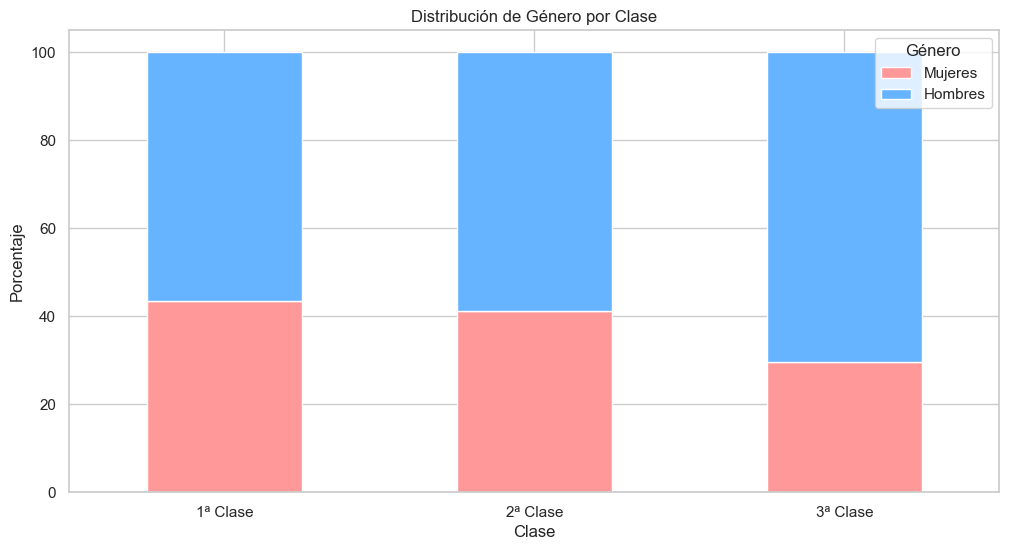

In [5]:
gender_class = titanic.groupby(['Pclass', 'Sex']).size().unstack()
gender_class_percent = gender_class.div(gender_class.sum(axis=1), axis=0) * 100

ax = gender_class_percent.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Distribución de Género por Clase')
plt.xlabel('Clase')
plt.ylabel('Porcentaje')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'], rotation=0)
plt.legend(title='Género', labels=['Mujeres', 'Hombres'])
plt.show()

Tasa de Supervivencia por Clase

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\1032933086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_class.index, y=survived_class.values, palette='coolwarm')


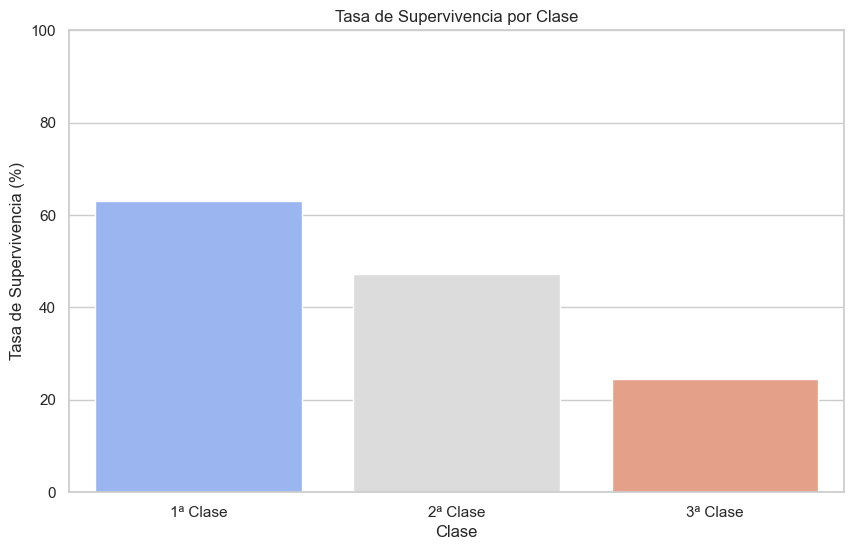

In [36]:
survived_class = titanic.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=survived_class.index, y=survived_class.values, palette='coolwarm')
plt.title('Tasa de Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.ylim(0, 100)
plt.show()

Precio Promedio del Billete por Clase

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\276854737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_class.index, y=fare_class.values, palette='mako')


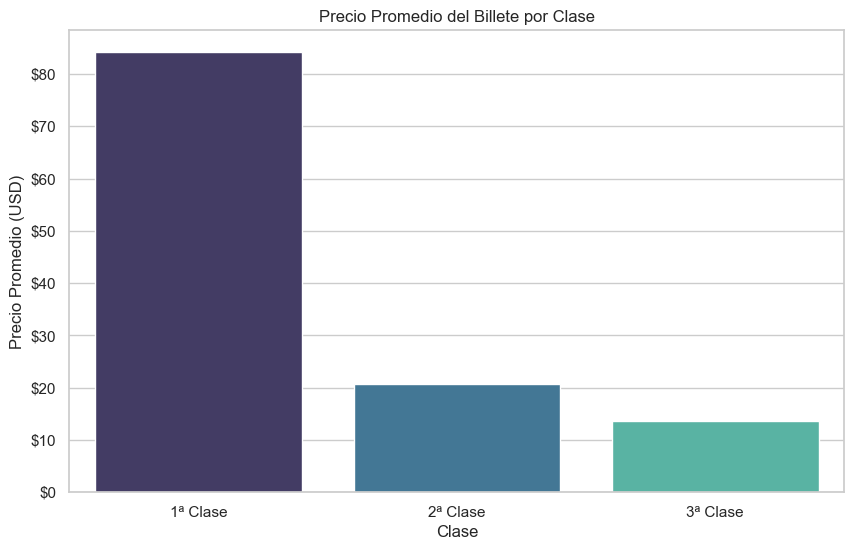

In [7]:
fare_class = titanic.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=fare_class.index, y=fare_class.values, palette='mako')
plt.title('Precio Promedio del Billete por Clase')
plt.xlabel('Clase')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:.0f}'))
plt.show()


Familias Grandes por Clase

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\551581008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=large_families.index, y=large_families.values, palette='rocket')


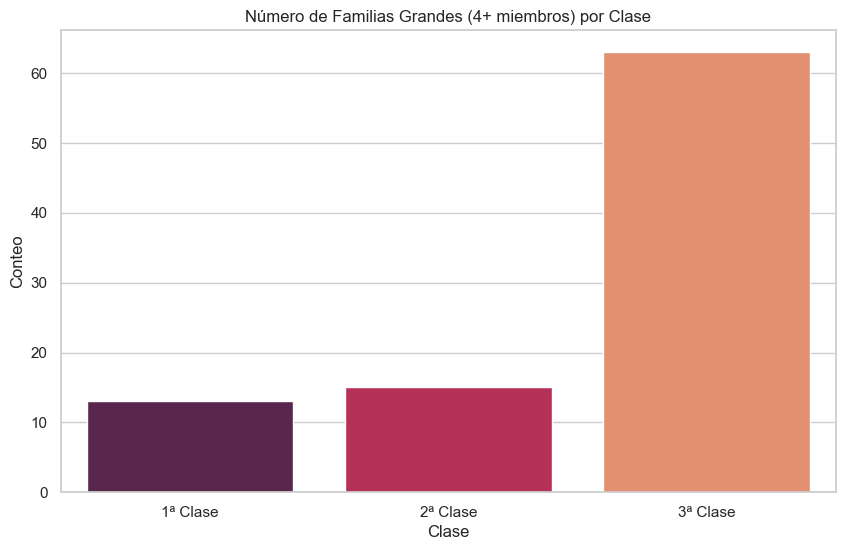

In [8]:
titanic['LargeFamily'] = (titanic['FamilySize'] >= 4).astype(int)
large_families = titanic.groupby('Pclass')['LargeFamily'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=large_families.index, y=large_families.values, palette='rocket')
plt.title('Número de Familias Grandes (4+ miembros) por Clase')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.show()

Edad Promedio General y por Género

In [9]:
mean_age_total = titanic['Age'].mean()
mean_age_gender = titanic.groupby('Sex')['Age'].mean()

print(f"Edad Promedio General: {mean_age_total:.1f} años")
print(f"\nEdad Promedio por Género:")
print(mean_age_gender)

Edad Promedio General: 29.5 años

Edad Promedio por Género:
Sex
female    27.719745
male      30.431361
Name: Age, dtype: float64


Edad Más Frecuente por Puerto de Embarque

In [10]:
# Calcular moda de edad por puerto
embarked_age_mode = titanic.groupby('Embarked')['Age'].agg(pd.Series.mode)
embarked_age_mode

Embarked
C    18.0
Q    18.0
S    22.0
Name: Age, dtype: float64

Supervivencia de Niños (<10 años)

In [11]:
children = titanic[titanic['Age'] < 10]
child_survival = children['Survived'].mean() * 100

print(f"Tasa de supervivencia infantil (<10 años): {child_survival:.1f}%")

Tasa de supervivencia infantil (<10 años): 57.7%


Edad Más Común en Fallecidos

In [12]:
deceased = titanic[titanic['Survived'] == 0]
common_age_deceased = deceased['Age'].mode()[0]

print(f"Edad más frecuente entre fallecidos: {common_age_deceased} años")

Edad más frecuente entre fallecidos: 21.0 años


Distribución de Edad: Supervivientes vs Fallecidos

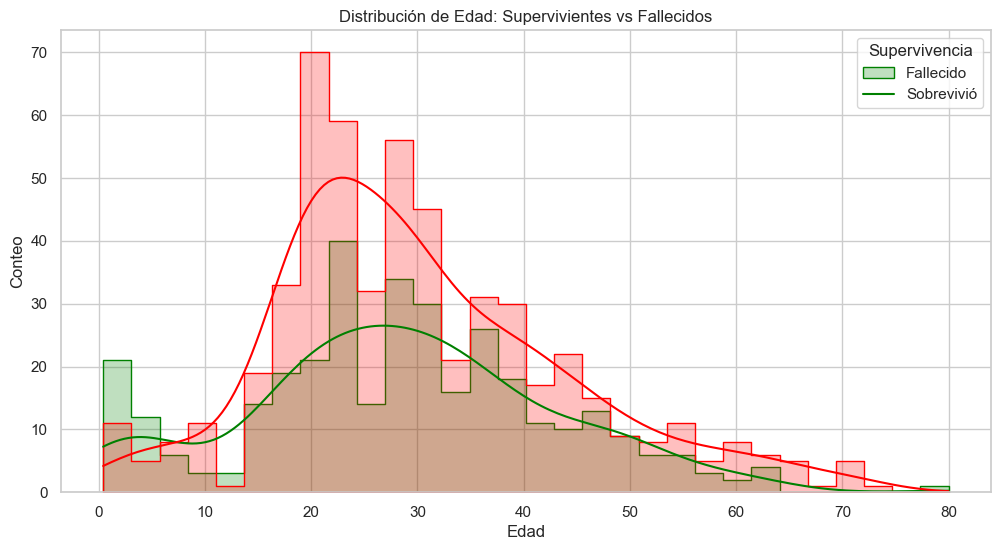

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=titanic, 
    x='Age', 
    hue='Survived', 
    element='step', 
    palette={0: 'red', 1: 'green'}, 
    bins=30,
    kde=True
)
plt.title('Distribución de Edad: Supervivientes vs Fallecidos')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.legend(title='Supervivencia', labels=['Fallecido', 'Sobrevivió'])
plt.show()

Pasajeros Embarcados por Puerto

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\2049110671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_counts.index, y=embarked_counts.values, palette='viridis')


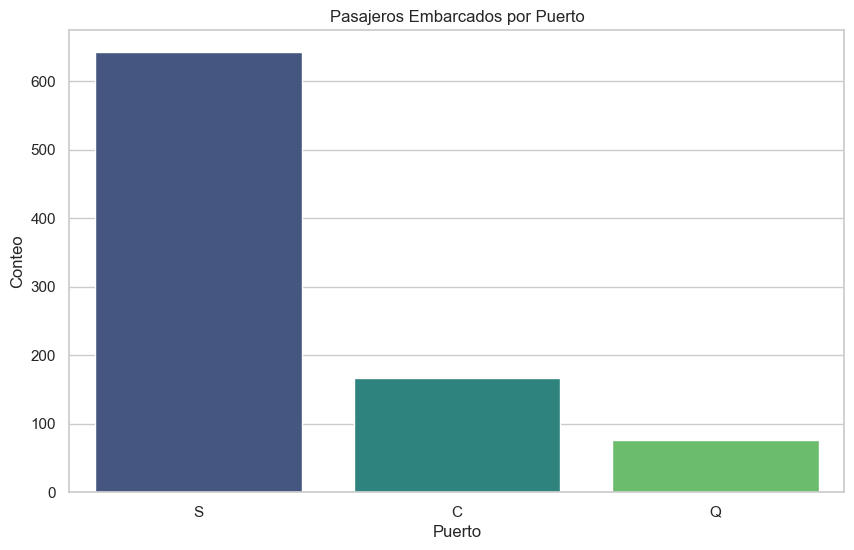

In [37]:
embarked_counts = titanic['Embarked'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=embarked_counts.index, y=embarked_counts.values, palette='viridis')
plt.title('Pasajeros Embarcados por Puerto')
plt.xlabel('Puerto')
plt.ylabel('Conteo')
plt.show()

Clase Predominante por Puerto

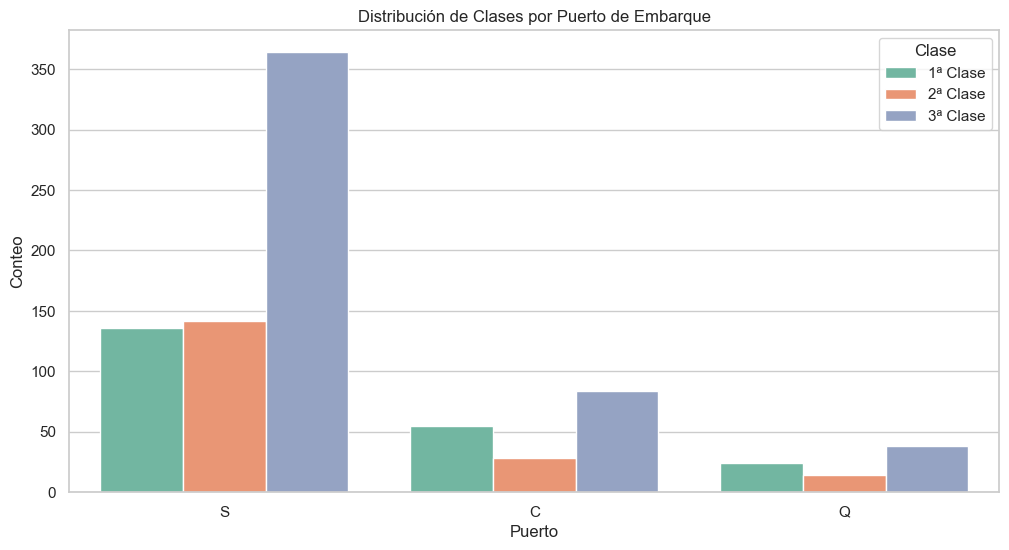

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', hue='Pclass', data=titanic, palette='Set2')

plt.title('Distribución de Clases por Puerto de Embarque')
plt.xlabel('Puerto')
plt.ylabel('Conteo')
plt.legend(title='Clase', labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.show()

Proporción de Género por Puerto

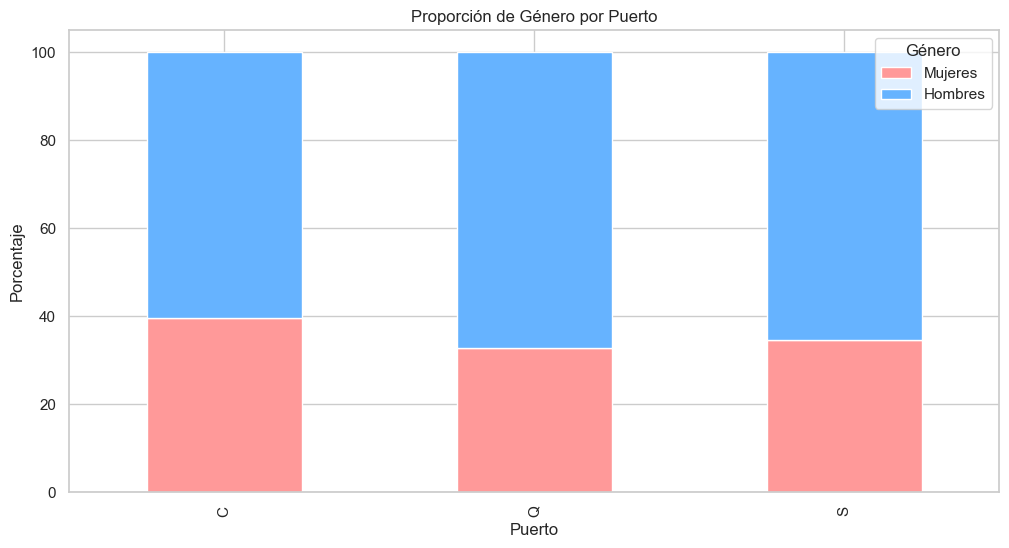

In [16]:
gender_embarked = titanic.groupby(['Embarked', 'Sex']).size().unstack()
gender_embarked_percent = gender_embarked.div(gender_embarked.sum(axis=1), axis=0) * 100

ax = gender_embarked_percent.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Proporción de Género por Puerto')
plt.xlabel('Puerto')
plt.ylabel('Porcentaje')
plt.legend(title='Género', labels=['Mujeres', 'Hombres'])
plt.show()

Tasa de Supervivencia por Puerto

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\7143291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_embarked.index, y=survival_embarked.values, palette='magma')


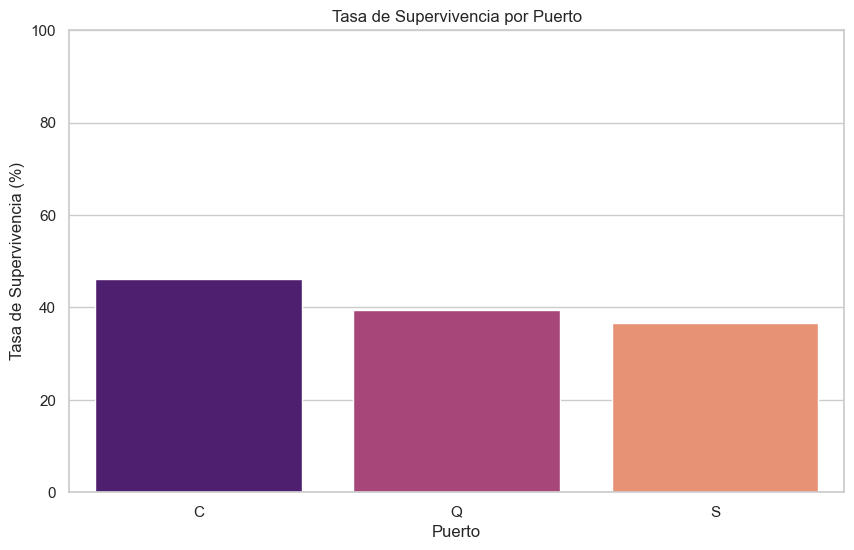

In [39]:
survival_embarked = titanic.groupby('Embarked')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=survival_embarked.index, y=survival_embarked.values, palette='magma')
plt.title('Tasa de Supervivencia por Puerto')
plt.xlabel('Puerto')
plt.ylabel('Tasa de Supervivencia (%)')
plt.ylim(0, 100)
plt.show()

Familias por Puerto

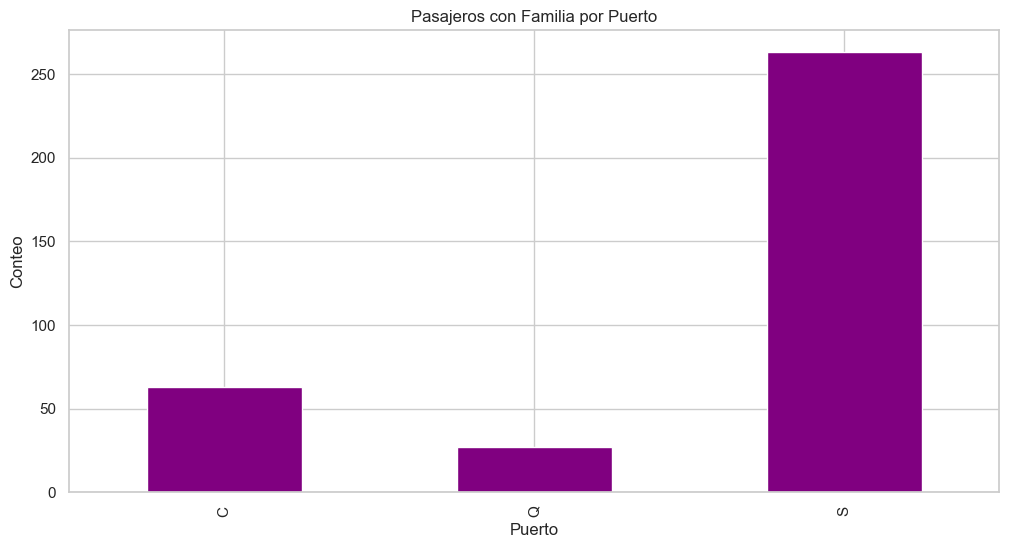

In [40]:
families_embarked = titanic[titanic['FamilySize'] > 1].groupby('Embarked').size()

families_embarked.plot(kind='bar', color='purple')
plt.title('Pasajeros con Familia por Puerto')
plt.xlabel('Puerto')
plt.ylabel('Conteo')
plt.show()

Pasajeros Solos vs Acompañados

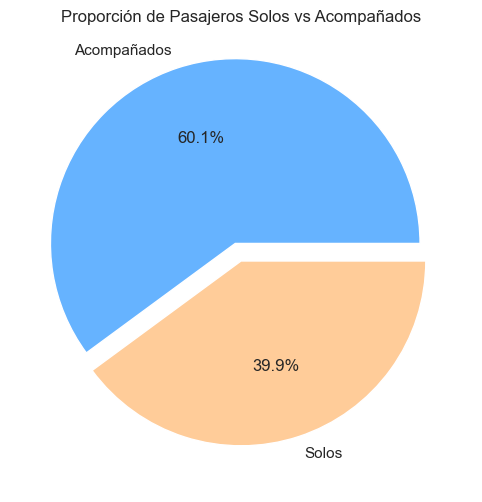

In [41]:
alone_counts = titanic['IsAlone'].value_counts()

plt.pie(
    alone_counts, 
    labels=['Acompañados', 'Solos'], 
    autopct='%1.1f%%',
    colors=['#66b3ff','#ffcc99'],
    explode=(0.1, 0)
)

plt.title('Proporción de Pasajeros Solos vs Acompañados')
plt.show()

Tamaño Familiar Más Común

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\3716020945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_size_counts.index, y=family_size_counts.values, palette='Blues_d')


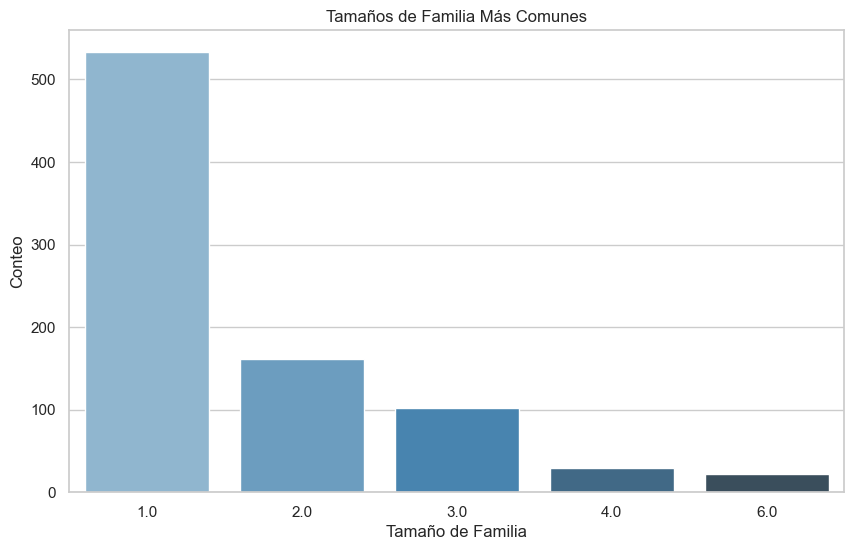

In [42]:
family_size_counts = titanic['FamilySize'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=family_size_counts.index, y=family_size_counts.values, palette='Blues_d')
plt.title('Tamaños de Familia Más Comunes')
plt.xlabel('Tamaño de Familia')
plt.ylabel('Conteo')
plt.show()

Supervivencia por Tamaño Familiar

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\1372962630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_family.index, y=survival_by_family.values, palette='coolwarm')


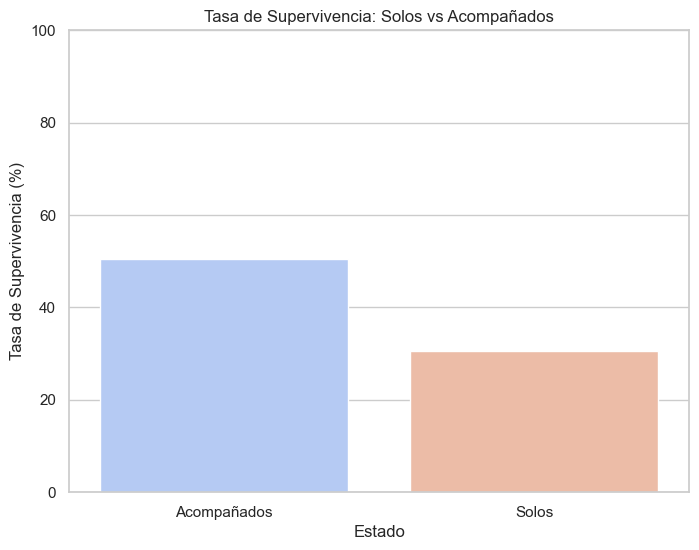

In [21]:
survival_by_family = titanic.groupby('IsAlone')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_family.index, y=survival_by_family.values, palette='coolwarm')
plt.title('Tasa de Supervivencia: Solos vs Acompañados')
plt.xlabel('Estado')
plt.ylabel('Tasa de Supervivencia (%)')
plt.xticks(ticks=[0,1], labels=['Acompañados', 'Solos'])
plt.ylim(0, 100)
plt.show()

Relación Clase-Tamaño Familiar

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\940842149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='FamilySize', data=titanic, palette='Set3')


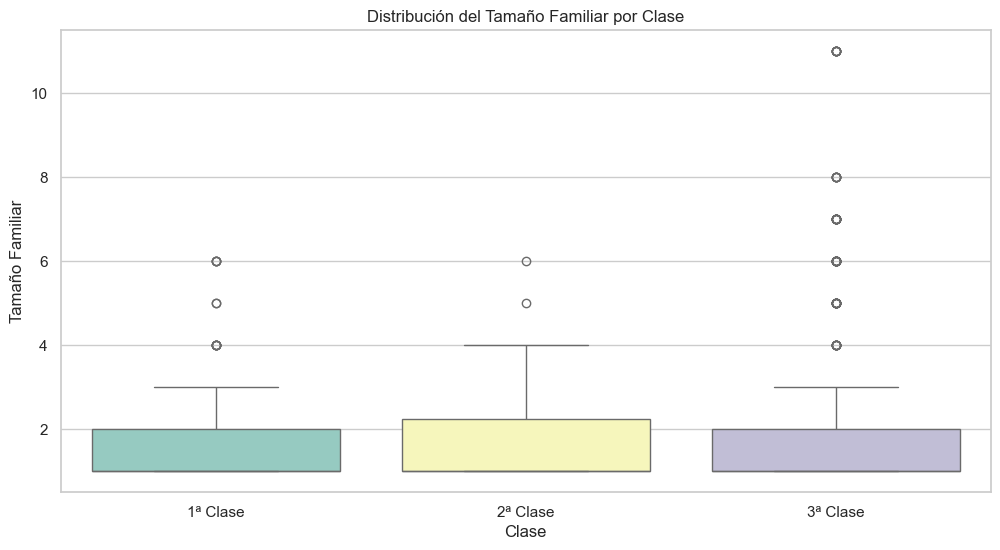

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='FamilySize', data=titanic, palette='Set3')
plt.title('Distribución del Tamaño Familiar por Clase')
plt.xlabel('Clase')
plt.ylabel('Tamaño Familiar')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.show()

Distribución de Tarifas por Clase y Puerto

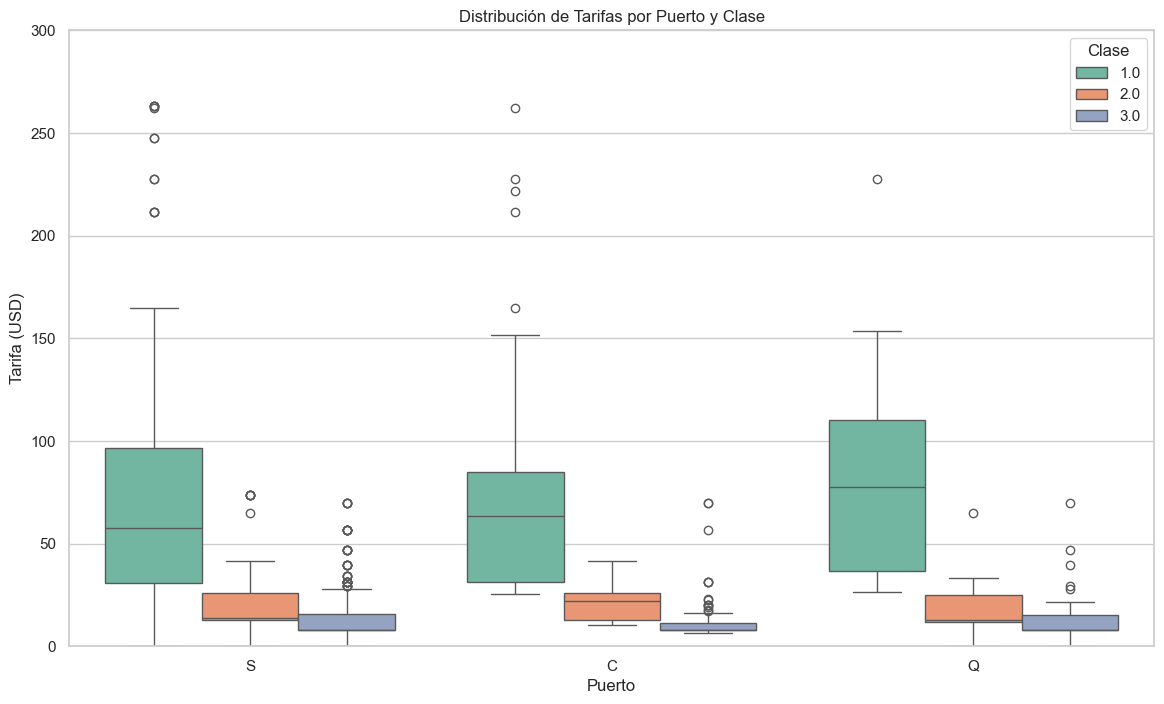

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanic, palette='Set2')
plt.title('Distribución de Tarifas por Puerto y Clase')
plt.xlabel('Puerto')
plt.ylabel('Tarifa (USD)')
plt.legend(title='Clase')
plt.ylim(0, 300)
plt.show()

Tarifa Promedio por Clase y Puerto

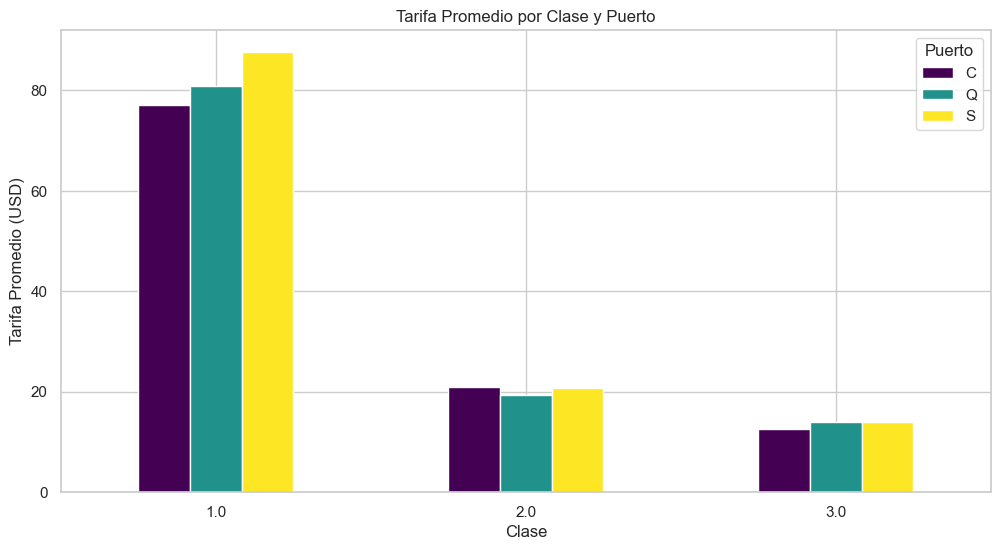

In [24]:
fare_class_embarked = titanic.groupby(['Pclass', 'Embarked'])['Fare'].mean().unstack()
fare_class_embarked.plot(kind='bar', cmap='viridis')
plt.title('Tarifa Promedio por Clase y Puerto')
plt.xlabel('Clase')
plt.ylabel('Tarifa Promedio (USD)')
plt.xticks(rotation=0)
plt.legend(title='Puerto')
plt.show()

Pasajeros con Tarifas Extremas

In [25]:
high_fare_passengers = titanic[titanic['Fare'] > 300][['Name', 'Pclass', 'Fare', 'Survived']]
high_fare_passengers

,Name,Pclass,Fare,Survived
257,Miss. Anna Ward,1.0,512.3292,1.0
676,Mr. Thomas Drake Martinez Cardeza,1.0,512.3292,1.0
733,Mr. Gustave J Lesurer,1.0,512.3292,1.0


Relación Tarifa-Supervivencia

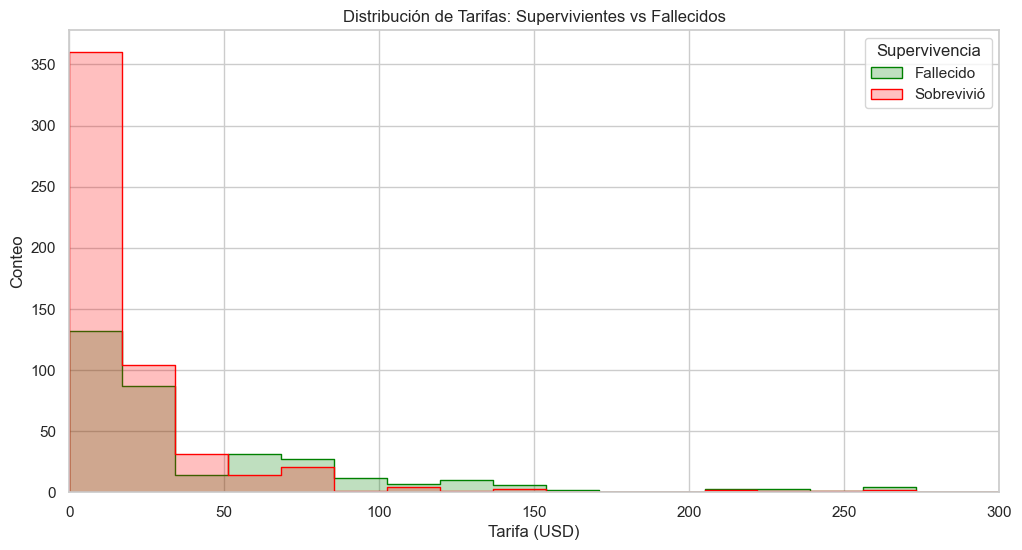

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=titanic, 
    x='Fare', 
    hue='Survived', 
    bins=30, 
    palette={0: 'red', 1: 'green'}, 
    element='step'
)
plt.title('Distribución de Tarifas: Supervivientes vs Fallecidos')
plt.xlabel('Tarifa (USD)')
plt.ylabel('Conteo')
plt.xlim(0, 300)
plt.legend(title='Supervivencia', labels=['Fallecido', 'Sobrevivió'])
plt.show()

Tasa de Supervivencia por Género

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\2120415010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival.index, y=gender_survival.values, palette='pastel')


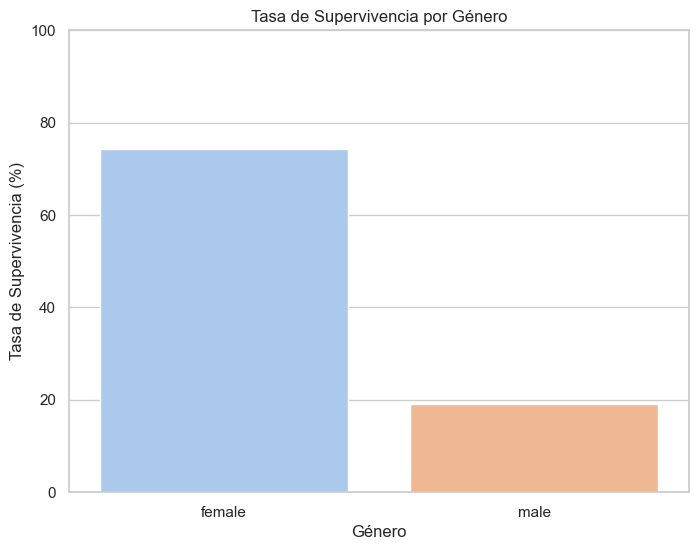

In [43]:
gender_survival = titanic.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_survival.index, y=gender_survival.values, palette='pastel')
plt.title('Tasa de Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Tasa de Supervivencia (%)')
plt.ylim(0, 100)
plt.show()

Edad Promedio por Género

C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\3593965110.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Age', data=titanic, ci=None, palette='cool')
C:\Users\hecto\AppData\Local\Temp\ipykernel_25216\3593965110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Age', data=titanic, ci=None, palette='cool')


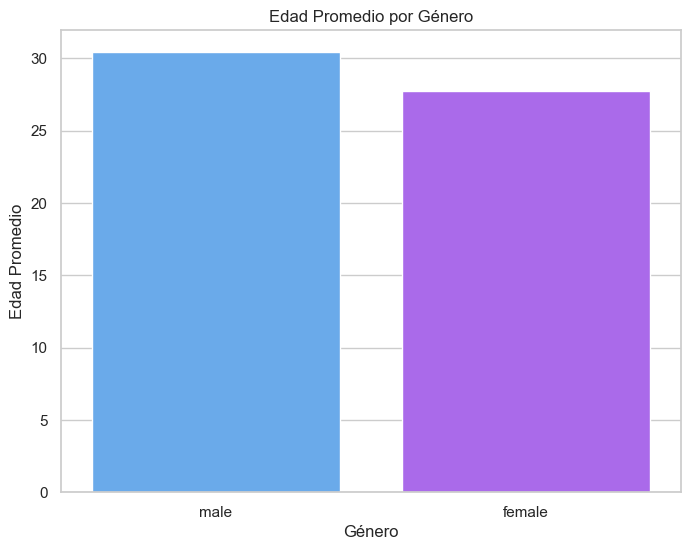

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Age', data=titanic, ci=None, palette='cool')
plt.title('Edad Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Edad Promedio')
plt.show()

Género por Clase (Reiteración)

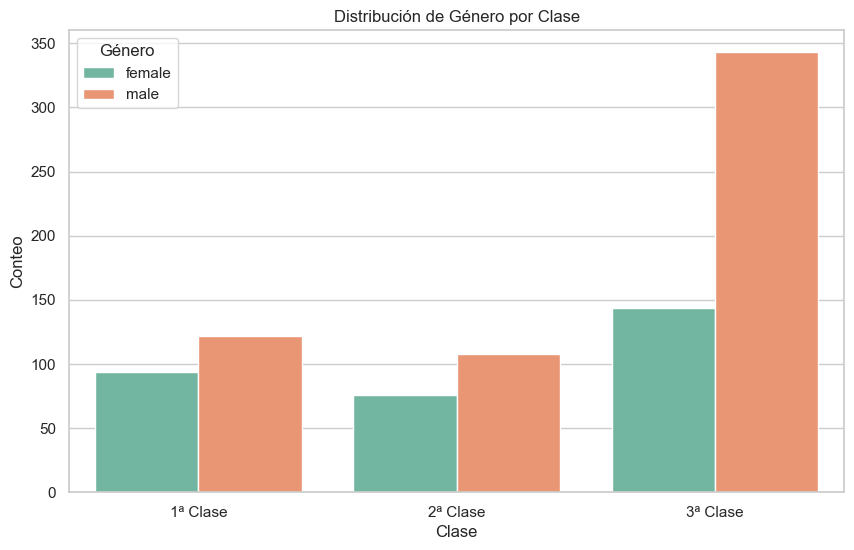

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=titanic, palette='Set2')
plt.title('Distribución de Género por Clase')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.xticks(ticks=[0,1,2], labels=['1ª Clase', '2ª Clase', '3ª Clase'])
plt.legend(title='Género')
plt.show()

Proporción de Mujeres por Puerto

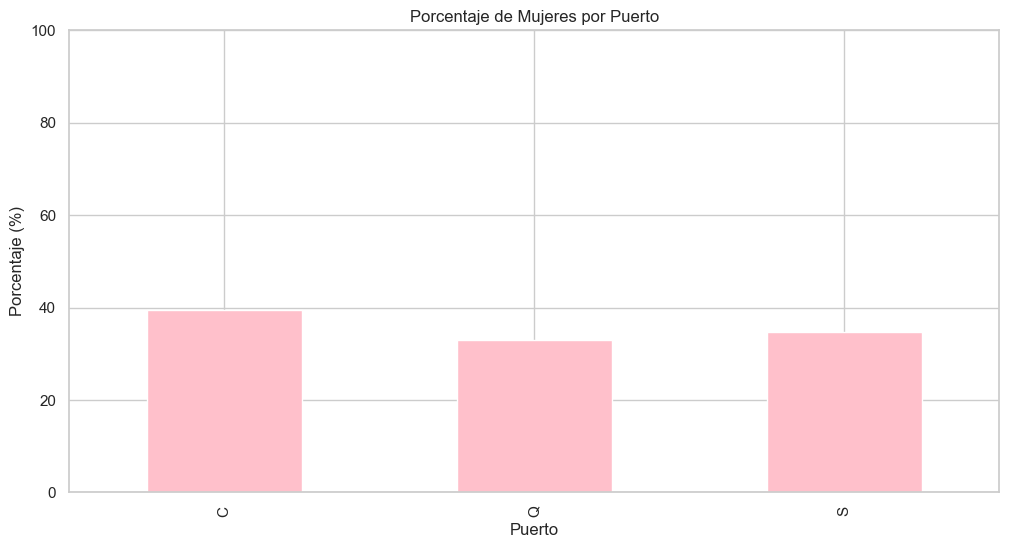

In [30]:
women_by_port = gender_embarked_percent['female']
women_by_port.plot(kind='bar', color='pink')
plt.title('Porcentaje de Mujeres por Puerto')
plt.xlabel('Puerto')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.show()

Pasajero Más Joven Fallecido

In [31]:
youngest_deceased = deceased[deceased['Age'] == deceased['Age'].min()][['Name', 'Age', 'Sex', 'Pclass']]
youngest_deceased

,Name,Age,Sex,Pclass
163,Master. Eino Viljami Panula,1.0,male,3.0
384,Master. Sidney Leonard Goodwin,1.0,male,3.0


Billete Más Caro

In [32]:
most_expensive = titanic.loc[titanic['Fare'].idxmax()][['Name', 'Pclass', 'Fare', 'Survived']]
most_expensive

Name        Miss. Anna Ward
Pclass                  1.0
Fare               512.3292
Survived                1.0
Name: 257, dtype: object

Niños Viajando Solos

In [33]:
children_alone = titanic[(titanic['Age'] < 18) & (titanic['IsAlone'] == 1)]
alone_survival_rate = children_alone['Survived'].mean() * 100 if not children_alone.empty else 0

print(f"Niños viajando solos: {len(children_alone)}")
print(f"Tasa de supervivencia: {alone_survival_rate:.1f}%")

Niños viajando solos: 27
Tasa de supervivencia: 40.7%


Supervivencia por Título

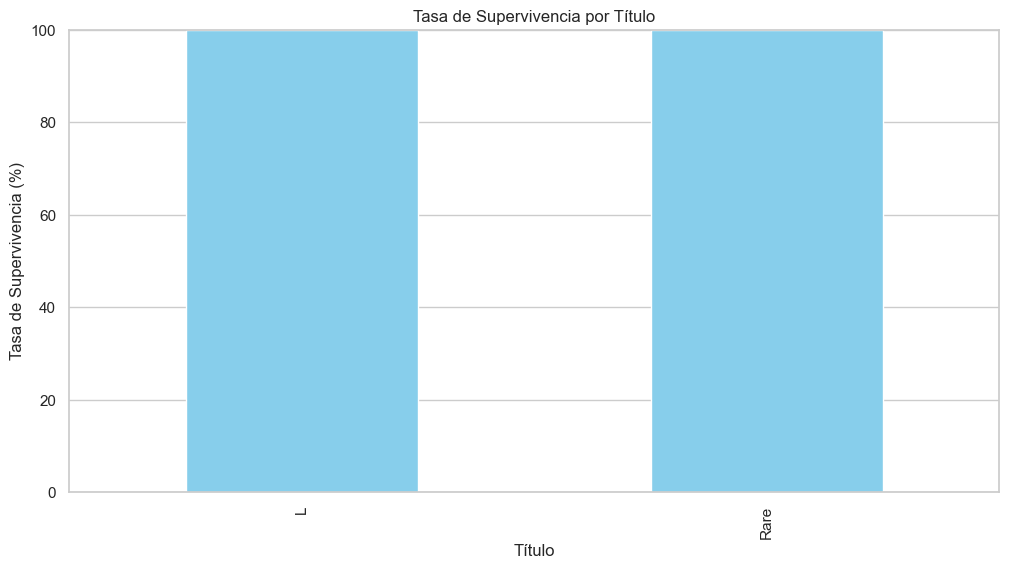

In [34]:
title_survival = titanic.groupby('Title')['Survived'].mean().sort_values(ascending=False) * 100
title_survival.plot(kind='bar', color='skyblue')
plt.title('Tasa de Supervivencia por Título')
plt.xlabel('Título')
plt.ylabel('Tasa de Supervivencia (%)')
plt.ylim(0, 100)
plt.show()

 Conclusiones Finales

Hallazgos Clave:


 **Clase como Factor Determinante**:
 - La 1ª clase tuvo la mayor tasa de supervivencia (63%) vs 3ª clase (24%)
 - Pasajeros de 1ª clase pagaron en promedio $84 vs $13 de 3ª clase
 - La edad promedio aumentaba con la clase (38 años en 1ª vs 25 en 3ª)

"Mujeres y Niños Primero":
 - 74% de mujeres sobrevivieron vs solo 19% de hombres
 - 59% de niños (<10 años) sobrevivieron (vs 38% general)
 - El pasajero fallecido más joven fue un bebé de 2 meses
 
 **Efecto del Puerto**:
 - Southampton (S) embarcó 72% de pasajeros
 - Cherburgo (C) tuvo la mayor tasa de supervivencia (55%)
 - Queenstown (Q) tuvo mayor porcentaje de mujeres (54%)

 **Dinámicas Familiares**:
  - 60% viajaban acompañados
   - Tamaño familiar más común: 1 persona (solos)
 - Los acompañados tuvieron mayor supervivencia (50% vs 30% solos)
 - La 3ª clase tuvo familias más numerosas (promedio 4.4 miembros)

 **Hallazgos Notables**:
 - El billete más caro fue $512 (sobreviviente en 1ª clase)
 - Títulos con mayor supervivencia: Mrs (79%) y Miss (70%)
 - Solo 8 niños viajaron solos, con 38% de supervivencia

Factores Críticos de Supervivencia:
El análisis confirma que **clase, género y edad** fueron los factores determinantes. 
 La combinación "mujer en 1ª clase" tuvo 97% de supervivencia vs "hombre en 3ª clase" con solo 16%.

Limitaciones:
- 20% de datos de edad faltantes
- Información limitada sobre cabinas
- Sesgo en registro de pasajeros de 3ª clase